## Dataset Prueba 1 - Tesis Javier-Uriel

### Importamos algunas librerías que nos serán útiles más adelante

In [1]:
import os
import time
import random

import pandas as pd # for dataframe operations. 
import numpy as np #for linear algebra operations.
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # for plotting

from scipy.fftpack import fft, fftfreq

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf

pd.set_option('display.max_columns', None) #Para mostrar todas las columnas
random.seed(1)

### Leemos el Dataset

In [2]:
#Dataset solo movimientos en Z
rpm_list = ['RPM0', 'RPM1', 'RPM2', 'RPM3']
states_list_org = ["vz","az", "uvz", 
                   "p", "q",
                   "wp", "wq", 
                   "ap", "aq"]
states_list_min = ["vz","az", "uvz"]
dataset_name = "Dataset_Z_Disturbance"
directory = "../logs/Datasets/"+dataset_name
ORDER = 3
dfs = []
states_list=states_list_org.copy()

### Corregir la salida 
El estado que entrega Pybullet de RPMs es la salida anterior, en este dataset se tomará RPMs como la salida actual. Si el primer elemento de RPMs es 0, es necesario hacer el shift

In [3]:
# Solo se hace 1 vez en todo el dataset
for filename in os.listdir(directory):
    if not filename.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(directory, filename))
    if any(df[rpm_list].loc[0]==0):
        df[rpm_list] = df[rpm_list].shift(periods=-1)
        df = df.dropna()
        df.to_csv(os.path.join(directory, filename), index=False)

In [4]:
for filename in os.listdir(directory):
    if not filename.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(directory, filename))
    a = []
    ## Desplazamos estados anteriores        
    for column in states_list:
        for n in range(1,ORDER+1):
            df[column+str(n)] = df[column].shift(periods=n, fill_value=0)
            a.append(column+str(n))
    dfs.append(df)
states_list+=a        
        
dataset = pd.concat(dfs)
dataset.head()

,timestamps,x,y,z,Q1,Q2,Q3,Q4,p,q,r,vx,vy,vz,wp,wq,wr,ax,ay,az,ap,aq,ar,RPM0,RPM1,RPM2,RPM3,ux,uy,uz,uvx,uvy,uvz,up,uq,ur,uwp,uwq,uwr,vz1,vz2,vz3,az1,az2,az3,uvz1,uvz2,uvz3,p1,p2,p3,q1,q2,q3,wp1,wp2,wp3,wq1,wq2,wq3,ap1,ap2,ap3,aq1,aq2,aq3
0,0.000000,0.0,0.0,24.999830,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.040833,0.0,0.0,0.0,0.0,0.0,-9.800000,0.0,0.0,0.0,15016.253501,15016.253501,15016.253501,15016.253501,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004167,0.0,0.0,24.999673,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.037676,0.0,0.0,0.0,0.0,0.0,0.757873,0.0,0.0,0.0,15016.253501,15016.253501,15016.253501,15016.253501,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.040833,0.000000,0.000000,-9.800000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008333,0.0,0.0,24.999529,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.034518,0.0,0.0,0.0,0.0,0.0,0.757737,0.0,0.0,0.0,15016.253501,15016.253501,15016.253501,15016.253501,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.037676,-0.040833,0.000000,0.757873,-9.800000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012500,0.0,0.0,24.999398,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.031362,0.0,0.0,0.0,0.0,0.0,0.757601,0.0,0.0,0.0,15016.253501,15016.253501,15016.253501,15016.253501,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.034518,-0.037676,-0.040833,0.757737,0.757873,-9.800000,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016667,0.0,0.0,24.999281,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.028206,0.0,0.0,0.0,0.0,0.0,0.757467,0.0,0.0,0.0,15016.253501,15016.253501,15016.253501,15016.253501,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.031362,-0.034518,-0.037676,0.757601,0.757737,0.757873,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Estados repetidos

En este caso se eliminan estados repetidos y estados que se encuentren en estado transitorio mientras el dron despega o se estabiliza antes de introducir la señal de control.

In [5]:
dataset_1 = dataset.drop(["timestamps"], axis=1)
print(f'shape (b4 drop) = {dataset_1.shape}')
dataset_dropped = dataset_1.drop_duplicates()
print(f'shape = {dataset_dropped.shape}')
print(f'len (b4 drop) - len = {dataset.shape[0]-dataset_dropped.shape[0]}')
print(f'columns = {dataset_dropped.columns}')

shape (b4 drop) = (1439940, 65)
shape = (1439720, 65)
len (b4 drop) - len = 220
columns = Index(['x', 'y', 'z', 'Q1', 'Q2', 'Q3', 'Q4', 'p', 'q', 'r', 'vx', 'vy', 'vz',
       'wp', 'wq', 'wr', 'ax', 'ay', 'az', 'ap', 'aq', 'ar', 'RPM0', 'RPM1',
       'RPM2', 'RPM3', 'ux', 'uy', 'uz', 'uvx', 'uvy', 'uvz', 'up', 'uq', 'ur',
       'uwp', 'uwq', 'uwr', 'vz1', 'vz2', 'vz3', 'az1', 'az2', 'az3', 'uvz1',
       'uvz2', 'uvz3', 'p1', 'p2', 'p3', 'q1', 'q2', 'q3', 'wp1', 'wp2', 'wp3',
       'wq1', 'wq2', 'wq3', 'ap1', 'ap2', 'ap3', 'aq1', 'aq2', 'aq3'],
      dtype='object')


In [25]:
states = dataset_dropped[states_list]
print(f'columns = {states.columns}')
print(f'shape = {states.shape}')
states.head()

columns = Index(['vz', 'az', 'uvz', 'p', 'q', 'wp', 'wq', 'ap', 'aq', 'vz1', 'vz2',
       'vz3', 'az1', 'az2', 'az3', 'uvz1', 'uvz2', 'uvz3', 'p1', 'p2', 'p3',
       'q1', 'q2', 'q3', 'wp1', 'wp2', 'wp3', 'wq1', 'wq2', 'wq3', 'ap1',
       'ap2', 'ap3', 'aq1', 'aq2', 'aq3'],
      dtype='object')
shape = (1439720, 36)


,vz,az,uvz,p,q,wp,wq,ap,aq,vz1,vz2,vz3,az1,az2,az3,uvz1,uvz2,uvz3,p1,p2,p3,q1,q2,q3,wp1,wp2,wp3,wq1,wq2,wq3,ap1,ap2,ap3,aq1,aq2,aq3
0,-0.040833,-9.800000,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.037676,0.757873,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.040833,0.000000,0.000000,-9.800000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.034518,0.757737,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.037676,-0.040833,0.000000,0.757873,-9.800000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.031362,0.757601,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.034518,-0.037676,-0.040833,0.757737,0.757873,-9.800000,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.028206,0.757467,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.031362,-0.034518,-0.037676,0.757601,0.757737,0.757873,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
states_duplicates = dataset[dataset.duplicated(keep='last')]
states_duplicates = states_duplicates.dropna()

Text(0.5, 0, 'Vz')

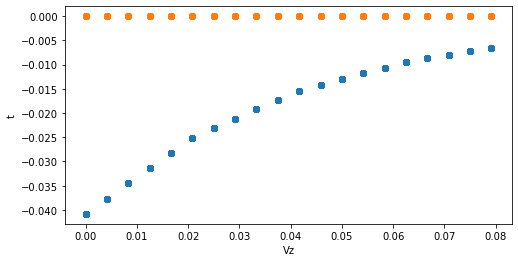

In [8]:
fig = plt.figure(figsize=(8, 4))
t = states_duplicates['timestamps']
y = states_duplicates['vz']
y_ref = states_duplicates['uvz']
plt.scatter(t, y)
plt.scatter(t, y_ref)
plt.ylabel('t')
plt.xlabel('Vz')

### Se grafican los datos

Se grafica un histograma de cada una de las propiedades los datos analizados individualmente por columnas, en el cual se observa que todos tienen distribuciones altamente apuntadas (curosis) y en algunos casos bimodales, pero de cualquier manera, no son uniformes

In [9]:
n_bins = 50
#_ = dataset.hist(bins=n_bins, figsize=(30,30))

### Análisis de estados

Text(0.5, 0, 'Error Vz')

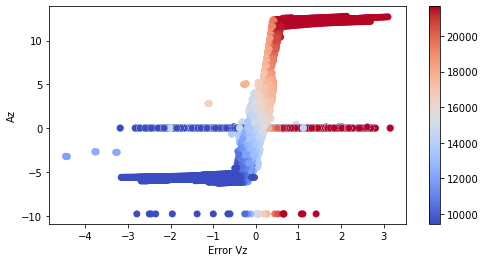

In [10]:
fig = plt.figure(figsize=(8, 4))
x = dataset['uvz']-dataset['vz']
y = dataset['az']
c = dataset['RPM0']
plt.scatter(x, y, c=c, cmap='coolwarm')
plt.colorbar()
plt.ylabel('Az')
plt.xlabel('Error Vz')

Text(0.5, 0, 'Vz')

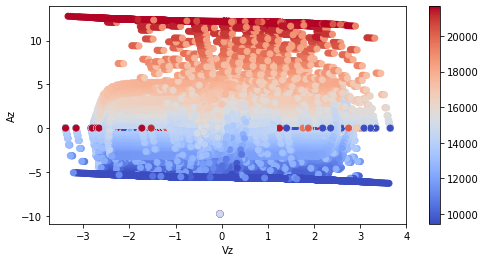

In [11]:
fig = plt.figure(figsize=(8, 4))
x = dataset['vz']
plt.scatter(x, y, c=c, cmap='coolwarm')
plt.colorbar()
plt.ylabel('Az')
plt.xlabel('Vz')

### Análisis de Fourier

#### Gráfica de algunas señales

In [12]:
def plot_fourier(df, states=['vz', 'uvz', 'az']):
    dt = df['timestamps'][1]-df['timestamps'][0]
    n = len(df['timestamps'])
    Y = fft(df[states[0]].to_numpy()) / n # Transformada normalizada
    Y_ref = fft(df[states[1]].to_numpy()) / n
    frq = fftfreq(n, dt)
    fig = plt.figure(figsize=(14, 10))
    ax1 = fig.add_subplot(221)
    ax1.plot(df['timestamps'], df[states[0]], df['timestamps'], df[states[1]])
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('$y(t)$')
    ax1.set_title('Señal en el tiempo (Vz y ref)')
    ax2 = fig.add_subplot(223)
    ax2.set_title('Señal en frecuencia (Vz y ref)')
    ax2.vlines(frq[0:int(n/50)], 0, abs(Y[0:int(n/50)]))
    ax2.vlines(frq[0:int(n/50)], 0, abs(Y_ref[0:int(n/50)]),  color='orange')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Abs($Y$)')

    Y = fft(df[states[2]].to_numpy()) / n # Transformada normalizada
    ax1 = fig.add_subplot(222)
    ax1.plot(df['timestamps'], df[states[2]])
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('$y(t)$')
    ax1.set_title('Señal en tiempo (az)')
    ax2 = fig.add_subplot(224)
    ax2.set_title('Señal en frecuencia (az)')
    ax2.vlines(frq[0:int(n/50)], 0, abs(Y[0:int(n/50)]))
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Abs($Y$)')

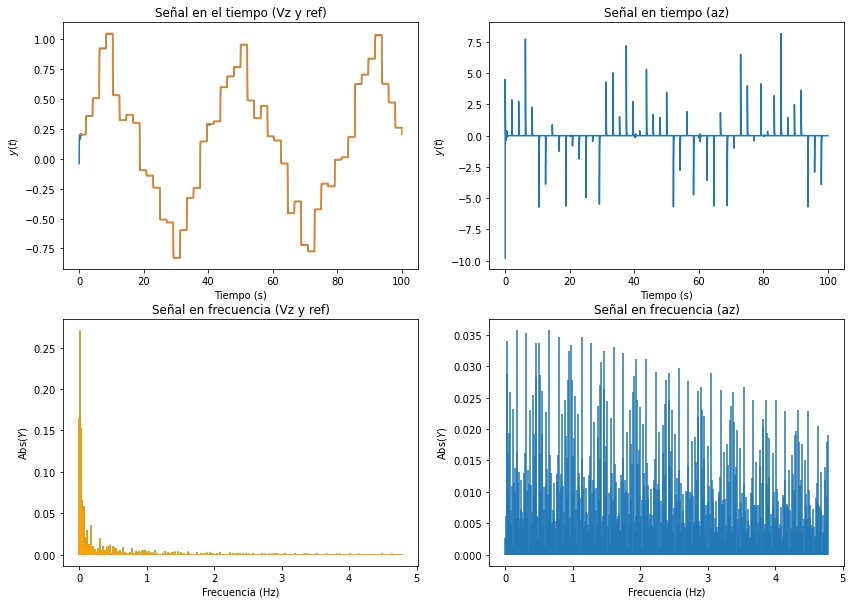

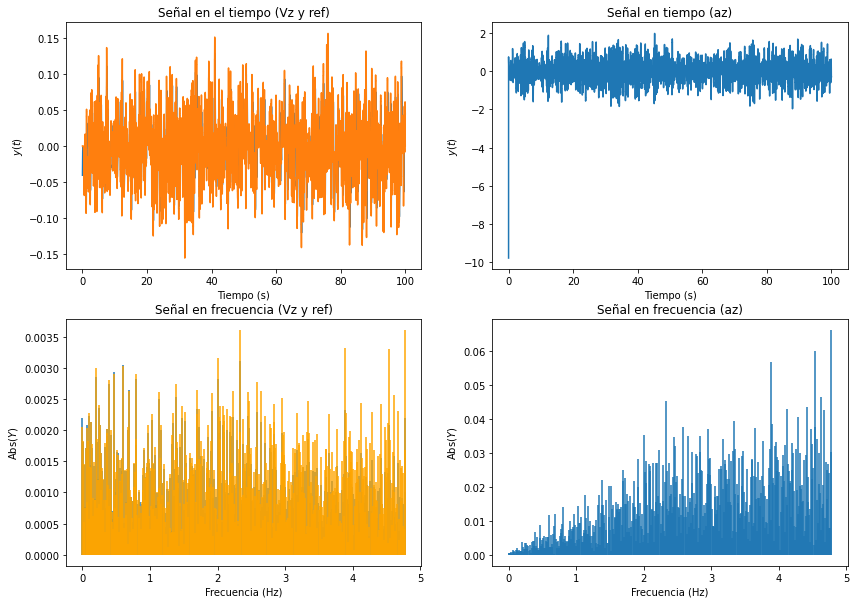

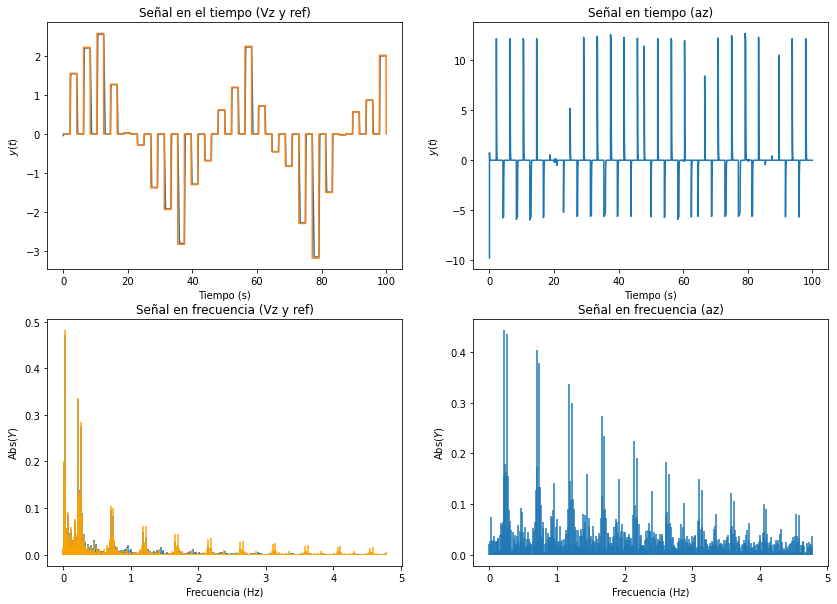

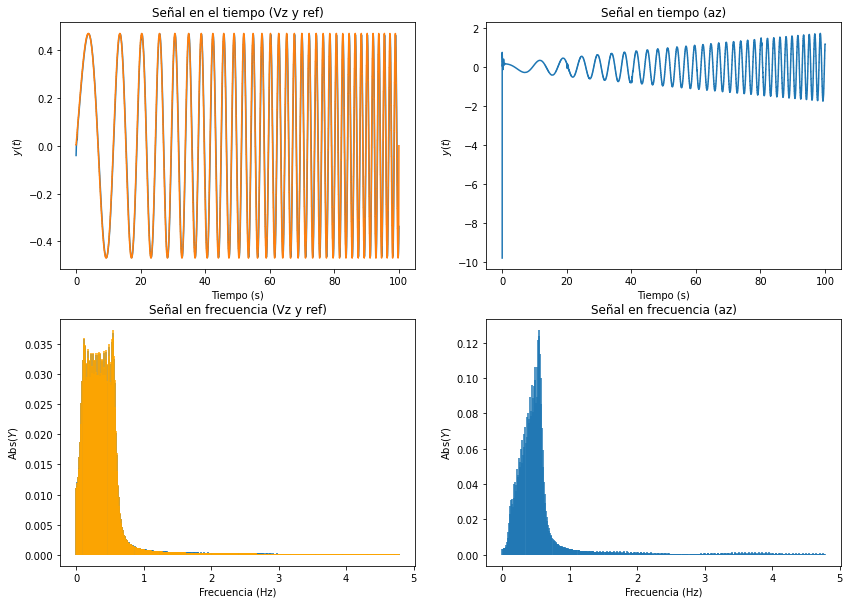

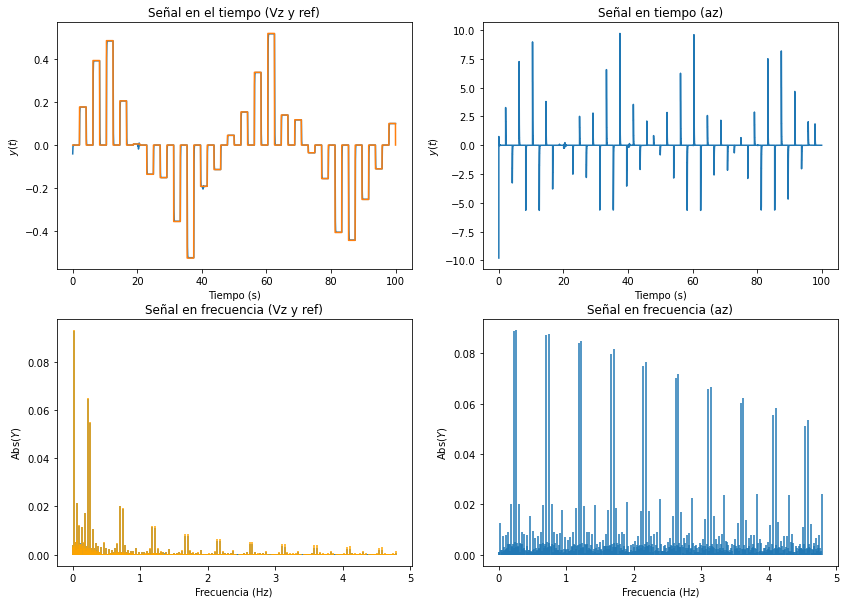

In [13]:
for df in random.choices(dfs, k = 5):
    plot_fourier(df)

#### Histograma

In [14]:
Fourier = []
for i, df in enumerate(dfs):
    dt = df['timestamps'][1]-df['timestamps'][0]
    n = len(df['timestamps'])
    Fourier.append({})
    for state in states_list_org:
        Fourier[i][state]={}
        Fourier[i][state]['Y'] = abs(fft(df[state].to_numpy())/n)[0:int(n/2)] # Transformada normalizada
        Fourier[i][state]['X'] = fftfreq(n, dt)[0:int(n/2)]

In [15]:
F = {}
for state in states_list_org:
    F[state]={}
    F[state]['X'] = []
    F[state]['Y'] = []
    for f in Fourier:
        F[state]['X'] = np.concatenate([F[state]['X'], f[state]['X']]) 
        F[state]['Y'] = np.concatenate([F[state]['Y'], f[state]['Y']]) 

Text(0.5, 0, 'Frecuency [Hz]')

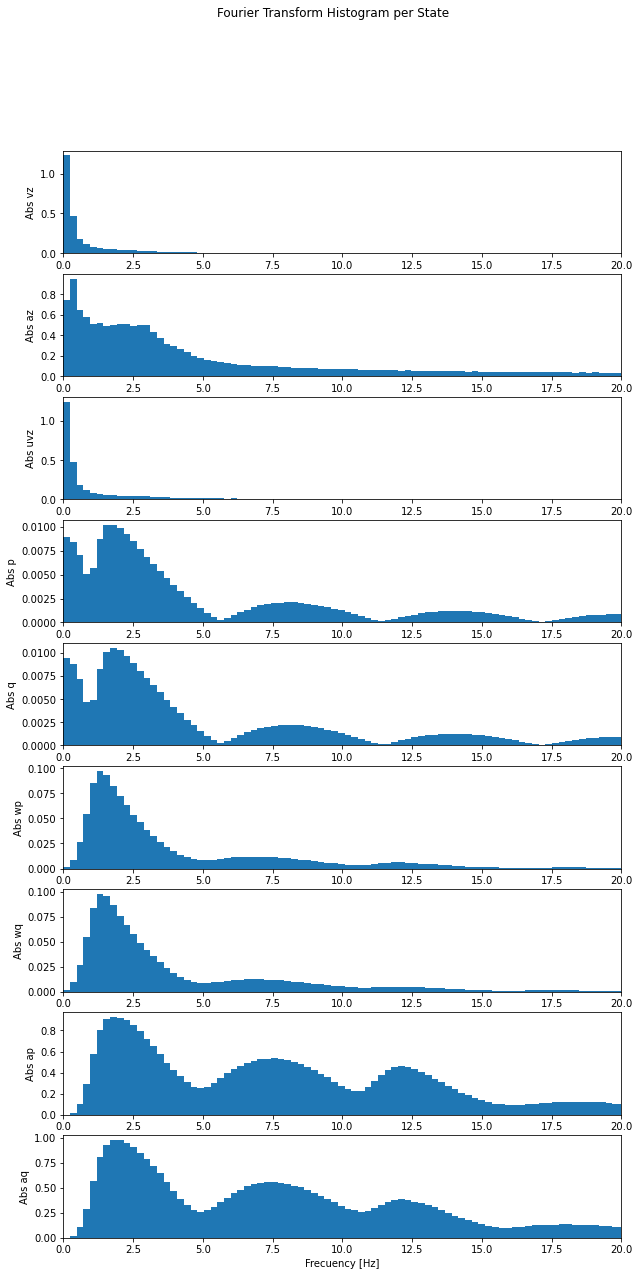

In [16]:
fig, axs = plt.subplots(len(states_list_org), 1, figsize=(10, 20))
fig.suptitle('Fourier Transform Histogram per State')
for i, state in enumerate(states_list_org):
    axs[i].hist(F[state]['X'], bins=10*n_bins, weights=((F[state]['Y']+1e-7)/len(Fourier)))
    axs[i].set_ylabel(f'Abs {state}')
    axs[i].set_xlim(0, 20)
axs[i].set_xlabel('Frecuency [Hz]')

### Análisis de Características - Método Estático

In [17]:
dataset.describe()

,timestamps,x,y,z,Q1,Q2,Q3,Q4,p,q,r,vx,vy,vz,wp,wq,wr,ax,ay,az,ap,aq,ar,RPM0,RPM1,RPM2,RPM3,ux,uy,uz,uvx,uvy,uvz,up,uq,ur,uwp,uwq,uwr,vz1,vz2,vz3,az1,az2,az3,uvz1,uvz2,uvz3,p1,p2,p3,q1,q2,q3,wp1,wp2,wp3,wq1,wq2,wq3,ap1,ap2,ap3,aq1,aq2,aq3
count,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1439940.0,1439940.0,1439940.0,1439940.0,1439940.0,1.439940e+06,1439940.0,1439940.0,1439940.0,1439940.0,1439940.0,1439940.0,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06,1.439940e+06
mean,4.999583e+01,1.167031e-02,-6.951738e-03,2.910301e+01,1.535882e-05,7.893396e-07,6.024339e-06,9.999676e-01,3.050909e-05,1.759260e-06,9.770158e-06,1.907361e-04,-1.226670e-04,6.552402e-02,1.735212e-06,1.165926e-06,7.853903e-06,-3.421687e-19,-1.015444e-18,1.861050e-03,6.231257e-19,-2.427330e-19,2.755697e-10,1.444497e+04,1.444489e+04,1.444495e+04,1.444492e+04,0.0,0.0,25.0,0.0,0.0,6.295316e-02,0.0,0.0,0.0,0.0,0.0,0.0,6.551627e-02,6.550848e-02,6.550065e-02,1.869911e-03,1.878779e-03,1.887653e-03,6.296014e-02,6.296711e-02,6.297409e-02,3.050909e-05,3.050909e-05,3.050909e-05,1.759260e-06,1.759260e-06,1.759260e-06,1.735212e-06,1.735212e-06,1.735212e-06,1.165926e-06,1.165926e-06,1.165926e-06,4.903406e-19,6.588540e-19,5.755926e-19,-2.437220e-19,-4.389830e-19,-6.199034e-19
std,2.886632e+01,5.895385e-02,5.284803e-02,8.899156e+00,5.660051e-03,5.703746e-03,3.557885e-04,2.977057e-04,1.135355e-02,1.140876e-02,7.897105e-04,1.478710e-02,1.494083e-02,7.761390e-01,7.966545e-02,8.097472e-02,1.059097e-02,8.740747e-02,8.946697e-02,1.282651e+00,1.296093e+00,1.329560e+00,5.541933e-01,9.476258e+02,9.489099e+02,9.480222e+02,9.485733e+02,0.0,0.0,0.0,0.0,0.0,7.866672e-01,0.0,0.0,0.0,0.0,0.0,0.0,7.761254e-01,7.761118e-01,7.760981e-01,1.282613e+00,1.282574e+00,1.282535e+00,7.866488e-01,7.866304e-01,7.866119e-01,1.135355e-02,1.135355e-02,1.135355e-02,1.140876e-02,1.140876e-02,1.140876e-02,7.966545e-02,7.966545e-02,7.966545e-02,8.097472e-02,8.097472e-02,8.097472e-02,1.296093e+00,1.296093e+00,1.296093e+00,1.329560e+00,1.329560e+00,1.329560e+00
min,0.000000e+00,-1.591308e-01,-1.819580e-01,1.413077e+01,-1.568830e-01,-9.907340e-02,-1.365384e-02,9.869594e-01,-3.159702e-01,-1.984465e-01,-3.211042e-02,-3.424727e-01,-5.370358e-01,-3.383819e+00,-2.426040e+00,-1.997995e+00,-2.709551e-01,-2.848227e+00,-3.457896e+00,-9.800000e+00,-1.726701e+01,-1.591711e+01,-1.301134e+01,9.440300e+03,9.440300e+03,9.440300e+03,9.440300e+03,0.0,0.0,25.0,0.0,0.0,-3.415860e+00,0.0,0.0,0.0,0.0,0.0,0.0,-3.383819e+00,-3.383819e+00,-3.383819e+00,-9.800000e+00,-9.800000e+00,-9.800000e+00,-3.415860e+00,-3.415860e+00,-3.415860e+00,-3.159702e-01,-3.159702e-01,-3.159702e-01,-1.984465e-01,-1.984465e-01,-1.984465e-01,-2.426040e+00,-2.426040e+00,-2.426040e+00,-1.997995e+00,-1.997995e+00,-1.997995e+00,-1.726701e+01,-1.726701e+01,-1.726701e+01,-1.591711e+01,-1.591711e+01,-1.591711e+01
25%,2.499583e+01,-2.937920e-02,-3.581103e-02,2.478857e+01,-4.100628e-17,-7.364891e-17,-7.513659e-06,1.000000e+00,-8.201255e-17,-1.472451e-16,-1.504609e-05,-4.709368e-16,-8.066408e-16,-2.021931e-01,-1.309726e-15,-1.488381e-15,-3.518152e-08,-1.439651e-15,-1.045075e-15,-1.403078e-01,-8.013511e-14,-8.013475e-14,-1.107805e-09,1.433411e+04,1.433258e+04,1.433421e+04,1.433258e+04,0.0,0.0,25.0,0.0,0.0,-2.068478e-01,0.0,0.0,0.0,0.0,0.0,0.0,-2.021708e-01,-2.021456e-01,-2.021286e-01,-1.402777e-01,-1.402441e-01,-1.402100e-01,-2.068288e-01,-2.067875e-01,-2.067454e-01,-8.201255e-17,-8.20125

#### Mapa de Correlación

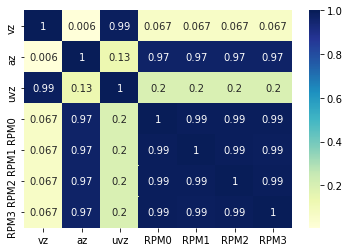

In [18]:
correlation = dataset[states_list_min + rpm_list].corr() #corr() method of pandas library calculates correlation between columns of dataframe
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()

#### Análisis de Correlaciones

In [19]:
# Comentado porque se demora mucho procesando
# for i in states_list_org:
#     sns.lmplot(x=i, y=rpm_list[0], data=dataset,line_kws={'color': 'red'})
#     text="Relation between RPM0 and " + i 
#     plt.title(text)
#     plt.show()

In [20]:
corr_df = pd.DataFrame()
for i in rpm_list:
    correlation = dataset.corr()[i] # convert series to dataframe so it can be sorted
    correlation_df = pd.DataFrame(correlation) # correct column label from Points to correlation
    correlation_df.columns = [f"Correlation_{i}"] # sort correlation
    corr_df = pd.concat([correlation_df, corr_df], axis=1)
corr_df = corr_df.dropna(how='all')
corr_df = corr_df.sort_values(by=[f'Correlation_{rpm_list[0]}'], ascending=False)
corr_df.head(30)

,Correlation_RPM3,Correlation_RPM2,Correlation_RPM1,Correlation_RPM0
RPM0,0.990566,0.991504,0.990864,1.000000
RPM2,0.990034,1.000000,0.990910,0.991504
RPM1,0.987385,0.990910,1.000000,0.990864
RPM3,1.000000,0.990034,0.987385,0.990566
az,0.967445,0.968577,0.967747,0.968638
az1,0.952331,0.953484,0.952664,0.953521
az2,0.937210,0.938384,0.937575,0.938397
az3,0.922083,0.923276,0.922478,0.923266
uvz,0.197482,0.197698,0.197530,0.197708
uvz1,0.193942,0.194151,0.193987,0.194164


### Análisis de Características - Método Dinámico

#### Autocorrelación Parcial

C:\Users\mrjar\.conda\envs\tesis\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mrjar\.conda\envs\tesis\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mrjar\.conda\envs\tesis\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mrjar\.conda\envs\tesis\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mrjar\.conda\envs\tesis\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


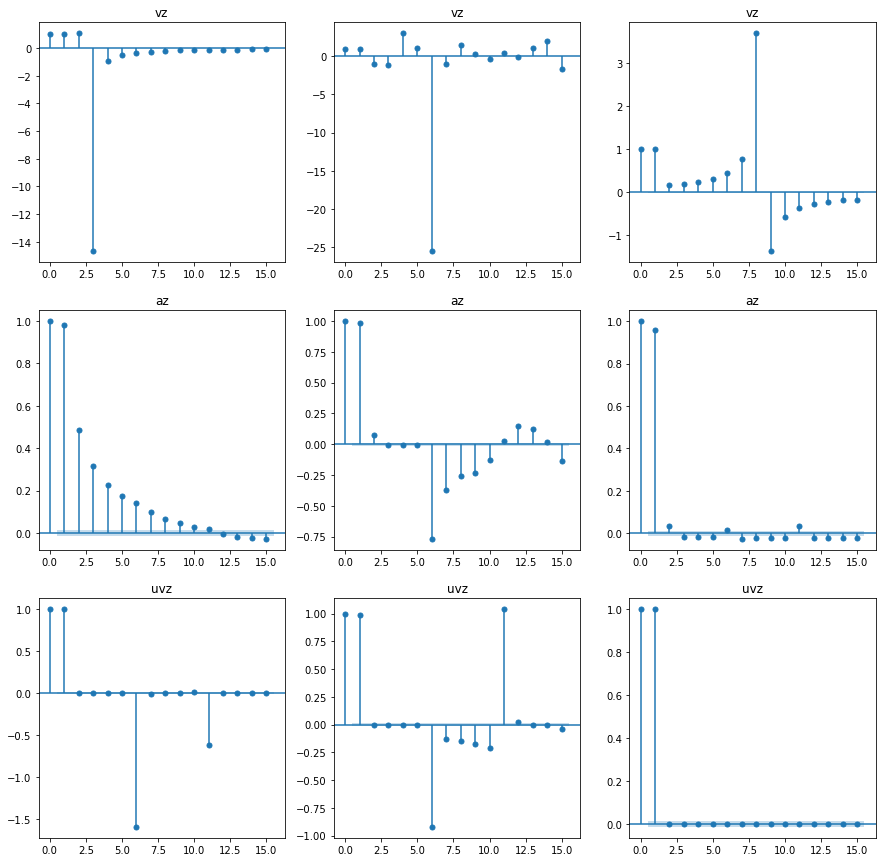

In [21]:
N_df = 3
nlags = 15
fig, axs = plt.subplots(N_df, len(states_list_min), figsize=(15, 15))
for k, df in enumerate(random.choices(dfs, k = N_df)):
    for j, i in enumerate(states_list_min):
        plot_pacf(df[i], lags=nlags, ax = axs[j, k])
        axs[j, k].set_title(i)

In [22]:
pacf_df = [pd.DataFrame()]*len(states_list_min)
for k, df in enumerate(dfs):
    for j, i in enumerate(states_list_min):
        tmp = pd.DataFrame(pacf(df[i], nlags=nlags), columns=[str(k)])
        pacf_df[j] = pd.concat([pacf_df[j], tmp], axis=1)
pacf_df_dict = {}
for j, i in enumerate(states_list_min):
    pacf_df_dict[i] =  pd.DataFrame()
    pacf_df_dict[i]['mean'] = pacf_df[j].T.mean()
    pacf_df_dict[i]['min'] = pacf_df[j].T.min()
    pacf_df_dict[i]['max'] = pacf_df[j].T.max()
    pacf_df_dict[i]['abs'] = np.maximum(pacf_df[j].T.max(), abs(pacf_df[j].T.min()))

C:\Users\mrjar\.conda\envs\tesis\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


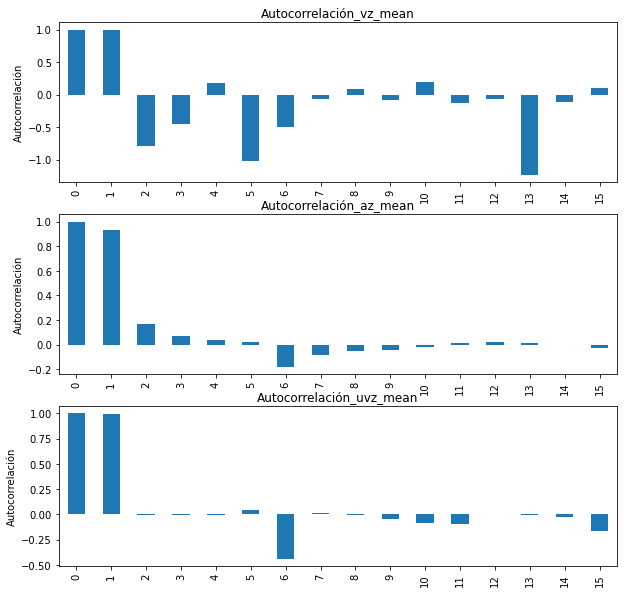

In [23]:
fig, axes = plt.subplots(nrows=len(states_list_min), ncols=1, figsize=(10, 10))
crt = 'mean'
for j, i in enumerate(states_list_min):
    pacf_df_dict[i][crt].plot(kind="bar", ax=axes[j])
    axes[j].set_ylabel('Autocorrelación')
    axes[j].set_title(f'Autocorrelación_{i}_{crt}')

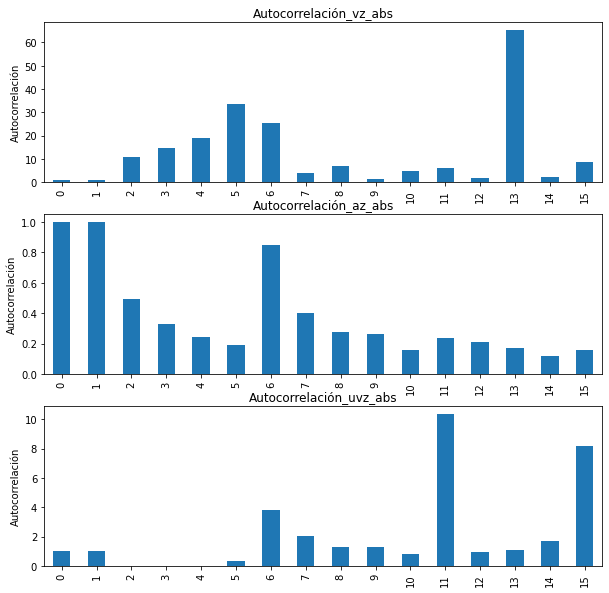

In [24]:
fig, axes = plt.subplots(nrows=len(states_list_min), ncols=1, figsize=(10, 10))
crt = 'abs'
for j, i in enumerate(states_list_min):
    pacf_df_dict[i][crt].plot(kind="bar", ax=axes[j])
    axes[j].set_ylabel('Autocorrelación')
    axes[j].set_title(f'Autocorrelación_{i}_{crt}')